  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
0.8907563025210085
0.85
classes :  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
prediction :  ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.    

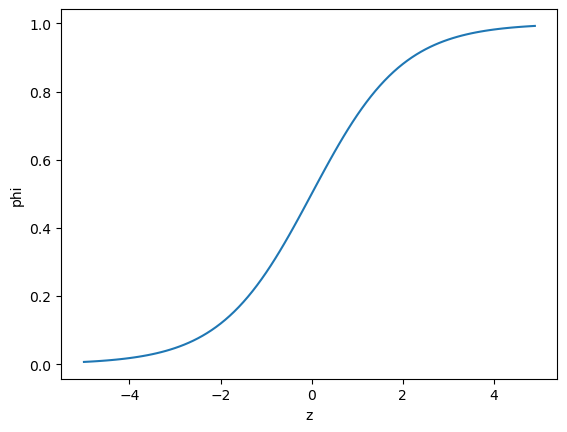

['A' 'C']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


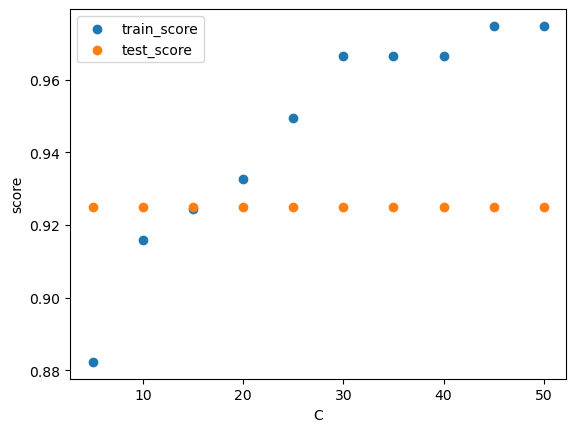

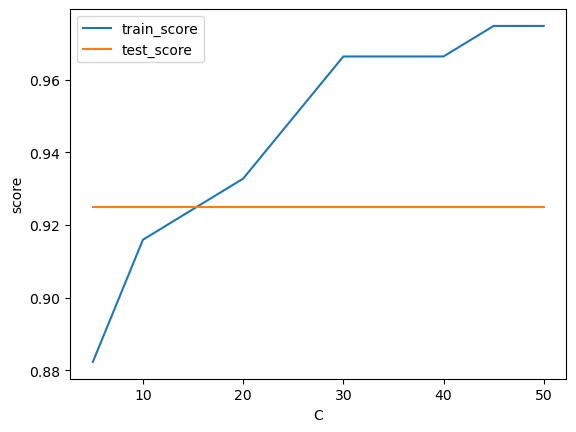

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5)
(7,)
[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [4]:
#Theme : Logistic_Regression


#This code uses the knn algorithm to predict which category the input value will belong to.
import pandas as pd
fish = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fish.csv')
print(fish.head())
print(pd.unique(fish['Species']))

#make input data (2-dimension data)
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[:5])

#make target data (linear data)
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])
#There is 7 target class ; Bream, Roach, Whiterfish, Parkki, Perch, Pike, Smelt
#We use target value convert to 0, 1 in previous algorithms
#But comfortablly, we can use string target value in scikit learn
#At this time, there is somthing to careful. When we give target value to scikit laern object, the object sort arphabetically
#Look below code;print(kn.classes_) and compare with pandas array

#split into train & test data set
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

#data preprocessing - standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#fit() method compute mean and standard deviation of each train_input row(Weight, Length, diagonal, Height, Width)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


#Let's predict probability of there is what kind of fish is contained using knn-algorithm
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))


#print classes sorted by alphabetically
print('classes : ', kn.classes_)
#kindly, predcit() method's output is target string
print('prediction : ', kn.predict(test_scaled[:5]))



import numpy as np
proba = kn.predict_proba(test_scaled[:5])
#round() method do round off. We can select how many decimal number we use.
print(np.round(proba, decimals = 4))
#As a result, above code round to the 5th decimal place.
#compare result of print(np.round(proba, decimals = 4)) and result of print(kn.predict(test_scaled[:5]))


#below codes are show sigmoid function
#logistic regression transform log(odds) value into probability value using sigmoid function
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.figure()
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


#Before scale-full logistic regression, lets do simple binary classification using logistic regression
#Just classify into bream and smelt
#boolean indexing test code
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])       #tranform python list into numpy array
print(char_arr[[True, False, True, False, False]])   #boolean indexing

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

##Now aplly logistic regression use this data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#In scikitlearn, mechanism of LogisticRegression (about fit() and predict() methods)
#logistic regression use log(odds) valuse
#log(odds) can approximate to linear equation(polynomial form
#lr.fit() method find optimical weight for each term(feature) and determine the linear equation that best explain the data.
#predict() method apply weight that get fit() method and compute log(odds) value of given value. For last Step, our model find probability by give calculated log(odds) value to sigmoid function.
lr.fit(train_bream_smelt, target_bream_smelt)
#Prediction that given data belongs to what kind of category
print(lr.predict(train_bream_smelt[:5]))
#Probability that given data belongs to each species
print(lr.predict_proba(train_bream_smelt[:5]))
#Show log(odds) value for each given data using dicision_funtion() method
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
#We can probability using this value and sigmoid function. 
#There is sigmoid function in scipy library. It is expit()
from scipy.special import expit
print(expit(decisions))
#upper code output is same with 2nd row of lr.predict_praba(). --> decision_fucntion return log(odds) value of positivity(equal to 1, 2nd row)





##My own code 
#visualizing in to version : scatter plot and line plot
#I expect I can find more visually optimal C value (regularization parameter) by this code
list_train_score = []
list_test_score = []
c_list = []
for i in range(5, 55, 5):
    c_list += [i]
for c in c_list:
    lr = LogisticRegression(C = c, max_iter = 1000)
    lr.fit(train_scaled, train_target)
    list_train_score += [lr.score(train_scaled, train_target)]
    list_test_score += [lr.score(test_scaled, test_target)]
#visualize in scatter plot version
plt.figure()
plt.scatter(c_list, list_train_score, label = 'train_score')
plt.scatter(c_list, list_test_score, label = 'test_score')
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.show()

#visualize in line plot version
plt.figure()

plt.plot(c_list, list_train_score, label = 'train_score')
plt.plot(c_list, list_test_score, label = 'test_score')
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.show()
#Score for test data set doesn't change even C value was changed



##Do multiclassify using logistic regression
#make model more simpler by c = 20
#designate number of iteration by max_iter = 1000
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))
print(lr.classes_)
print(lr.coef_.shape)
print(lr.intercept_.shape)

#In multiple classification, model doesn't use sigmoid function to transform value into probability
#It use "softmax" function
#Let's find each probability using softmax function
#decision_function method return log(odds) value
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

#추가적인 메모.
#기본적으로 fit(train_data, target_data)의 메커니즘은 동일하다. 
#machine이 train_data의 값을 받는다 --> 예측한다. --> target_data(answer)과 비교한다.(정답과 오답을 비교) --> 가중치를 조절한다.
#해당 mechanism의 반복, 머신러닝 모델마다 예측과 가중치를 조절할때 사용하는 수학적 모델에서 차이가 나고 이에 따라 여러 가지 머신러닝 모델로 분류되는 것이다.